In [1]:
import os
import IPython.display
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import clip
from collections import OrderedDict
import torch
import skimage

/home/arty/anaconda3/envs/clip/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_dir = './img/'
model, preprocess = clip.load("ViT-B/32")

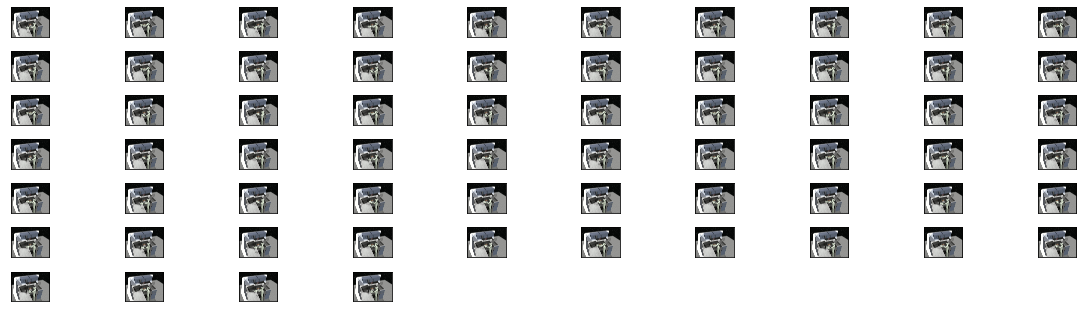

In [3]:
original_images = []
images = []
plt.figure(figsize=(16, 5))

for filename in [filename for filename in os.listdir(data_dir) if filename.endswith(".png") or filename.endswith(".jpg")]:

    image = Image.open(os.path.join(data_dir, filename)).convert("RGB")
  
    plt.subplot(8, 10, len(images)+1)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

    original_images.append(image)
    images.append(preprocess(image))


plt.tight_layout()

In [4]:
image_input = torch.tensor(np.stack(images)).cuda()

In [5]:
image_input.size()

torch.Size([64, 3, 224, 224])

In [28]:
with torch.no_grad():
    image_features = model.encode_image(image_input).float()

In [29]:
len(image_features)

64

In [34]:
# final = []
similarity = []
image_features /= image_features.norm(dim=-1, keepdim=True)
similarity = np.dot(image_features.cpu().numpy(), image_features.cpu().numpy().T)
# for i in range(len(image_features)):
#     # image_features /= image_features.norm(dim=-1, keepdim=True)
#     # final = np.dot(image_features[i].cpu().numpy(), final)
#     save = image_features.cpu().numpy() @ image_features.cpu().numpy().T
#     similarity.append(save)

In [35]:
len(similarity)

64

Text(0.5, 1.0, 'Cosine similarity between image features')

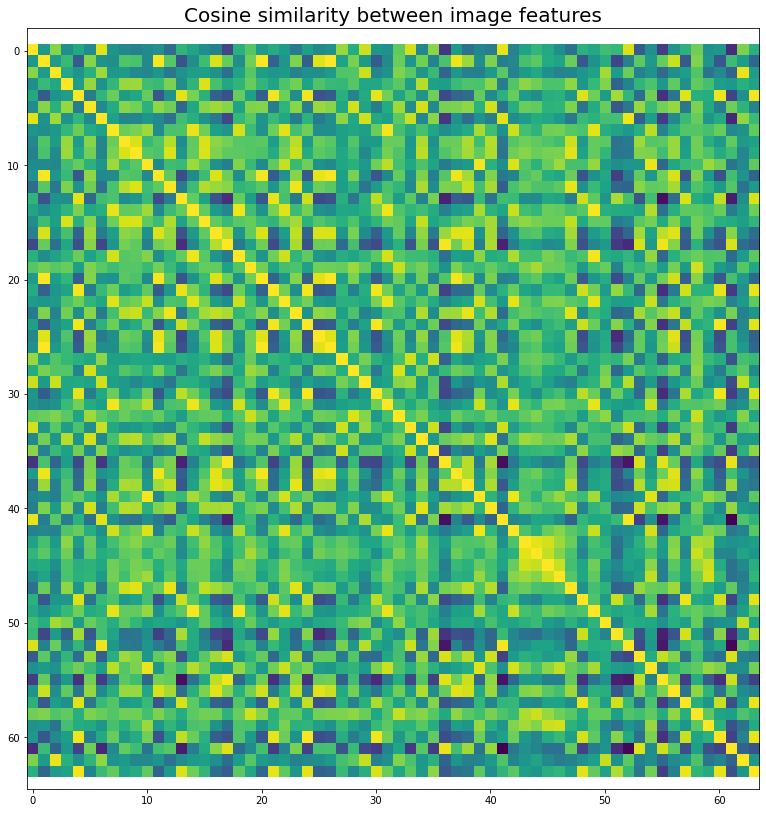

In [43]:
count = len(image_features)

plt.figure(figsize=(20, 14))
plt.imshow(similarity)
# plt.colorbar()
# plt.yticks(range(count), similarity, fontsize=18)
# plt.xticks([])
# for x in range(similarity.shape[1]):
    # for y in range(similarity.shape[0]):
        # plt.text(x, y, f"{similarity[y, x]:.2f}", ha="center", va="center", size=12)

for side in ["left", "top", "right", "bottom"]:
  plt.gca().spines[side].set_visible(True)

plt.xlim([-0.5, count - 0.5])
plt.ylim([count + 0.5, -2])

plt.title("Cosine similarity between image features", size=20)